In [1]:
import numpy as np
from matplotlib import pyplot as plt

from Alcohol.caching import load
from Processing.time_series import TimeSeries, PriceQuantity as PQ

In [2]:
pq = load(dir_path="../Alcohol/Caches", identifier="0")

In [3]:
ts = TimeSeries(pq)
longest_ts = ts.get_nth_longest(0)
top_5 = ts.get_n_longest(20)

In [4]:
for element in top_5:
    print(element.quantity.astype(int))

[ 18 208 145 145 172]
[  5  82 315 239 240]
[ 74 440 610 640 677]
[  3 138 474 275 596]
[ 92 511 404 616 702]
[ 28 176 222 244 282]
[ 37 109 108 103  90]
[ 10  69 123 189 137]
[  4 181 385 408 395]
[  8 319 398 380 342]
[  78 1069 1727 1669 2311]
[ 22  82 115 226 262]
[ 84 398 560 683 787]
[  350  5966 12194 11537 16267]
[ 163 1380 2559 3298 3306]
[ 53 480 486 714 770]
[ 19 176 426 400 529]
[  5 396 496 533 588]
[  96  476  874 1006 1480]
[ 55 327 341 330 403]


In [5]:
for element in top_5:
    print("normal: ", np.corrcoef(x=element.price, y=element.quantity)[0, 1])
    print("demeaned: ", np.corrcoef(x=element.price, y=PQ.skip_demean_quantity(element, period=12).quantity)[0, 1])
    shifted = PQ.shift_price(element, 1)
    print("shifted: ", np.corrcoef(x=shifted.price, y=PQ.skip_demean_quantity(shifted, period=12).quantity)[0, 1])
    print("---------")


normal:  -0.3132815043615222
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  -0.8327267638946152
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  0.14411954531205876
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  1.499033308850741e-16
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
---------
normal:  nan
demeaned:  nan
shifted:  nan
--------

/Users/alex/.pyenv/versions/maturitni/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alex/.pyenv/versions/maturitni/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/alex/.pyenv/versions/maturitni/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alex/.pyenv/versions/maturitni/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


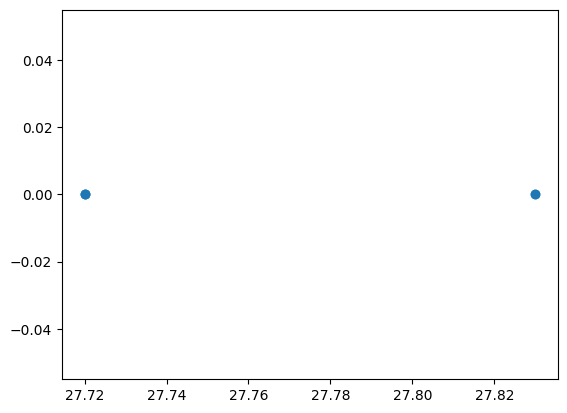

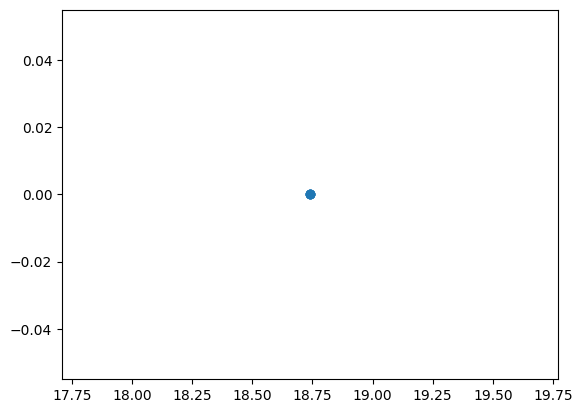

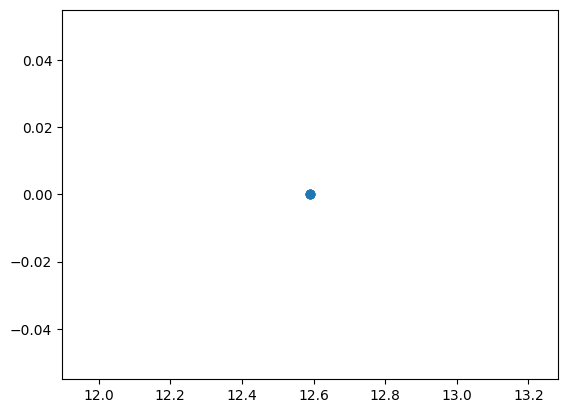

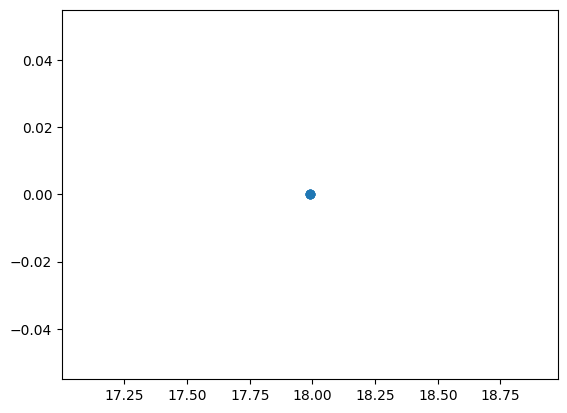

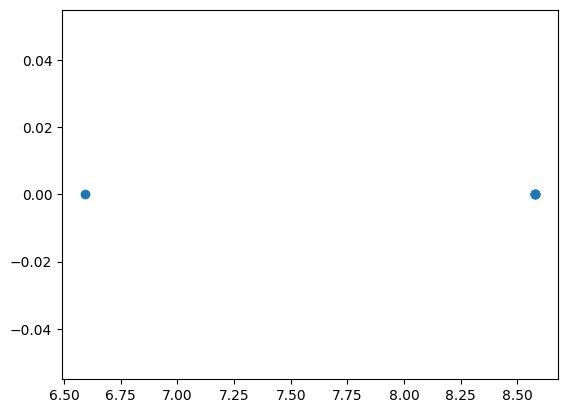

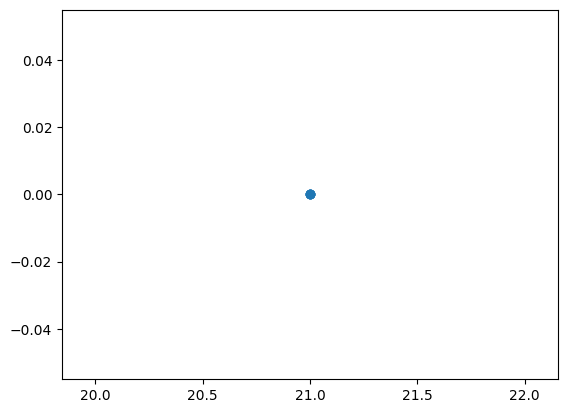

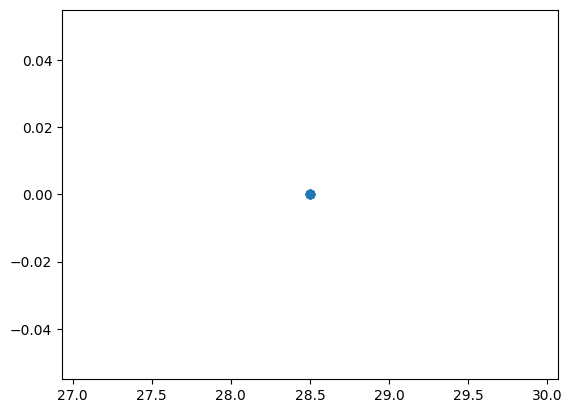

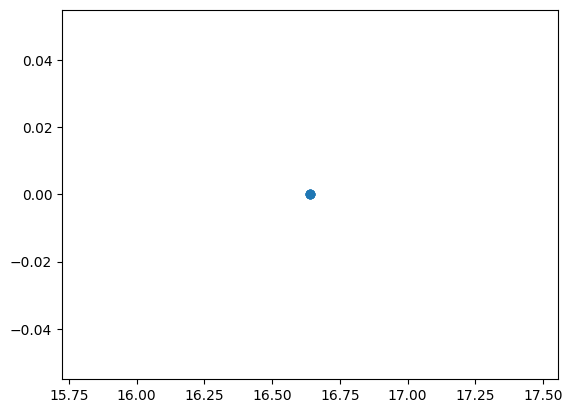

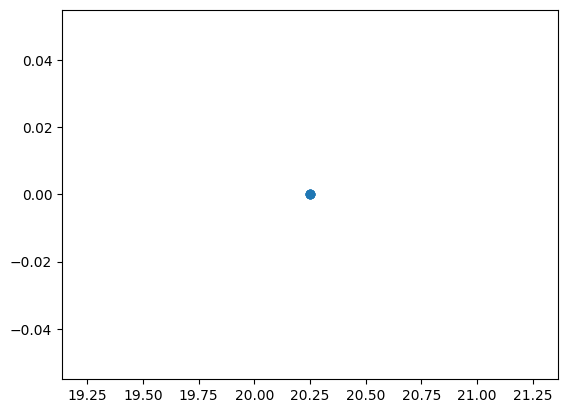

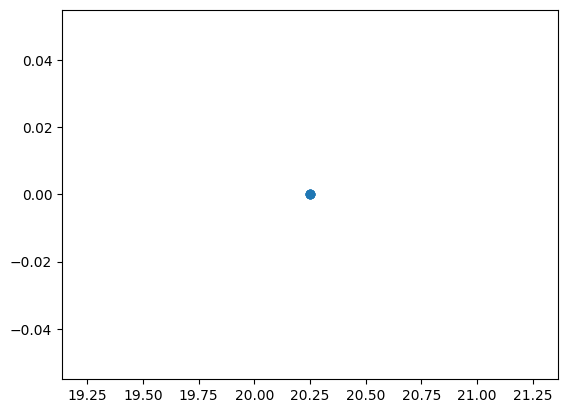

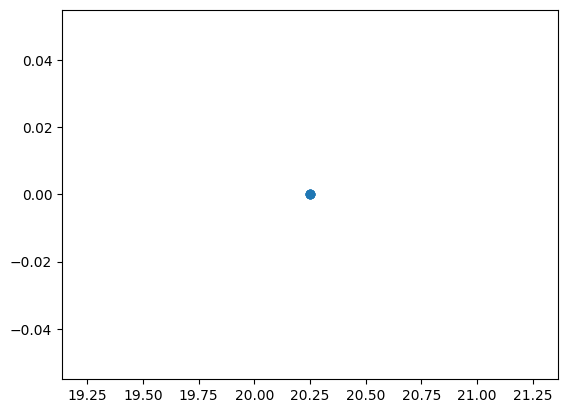

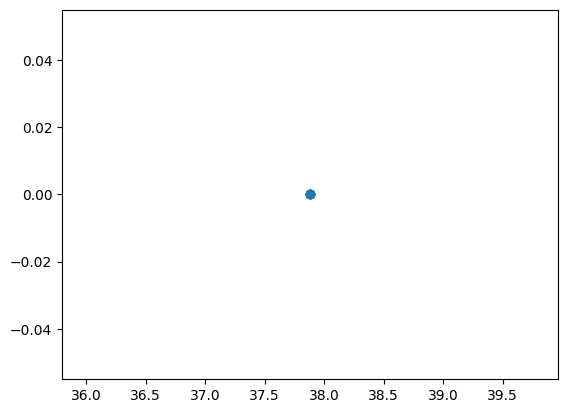

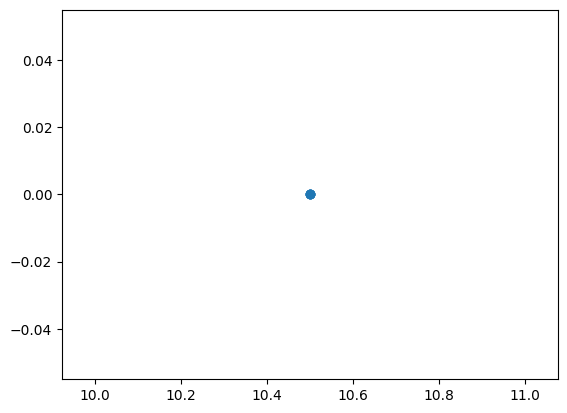

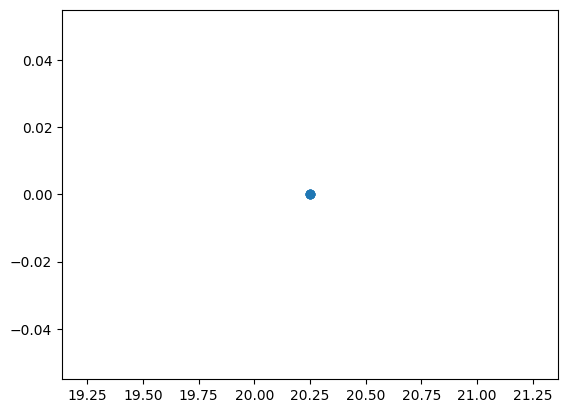

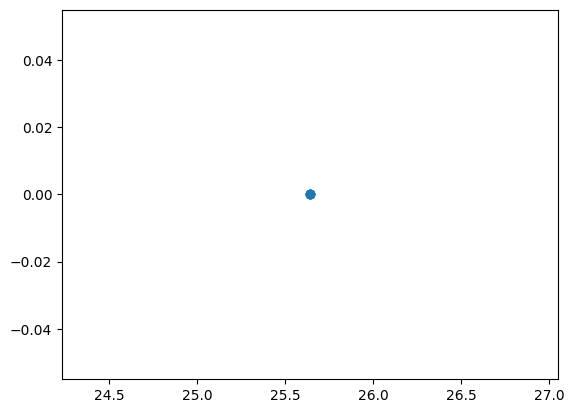

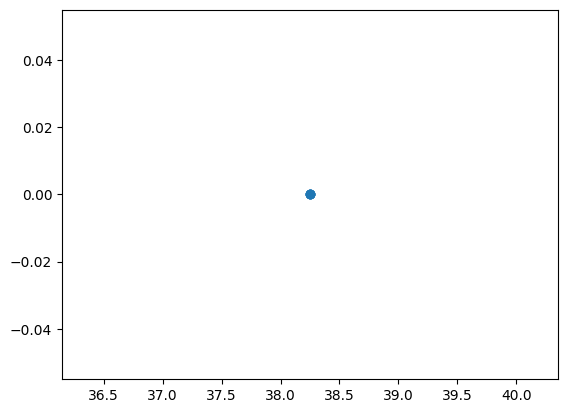

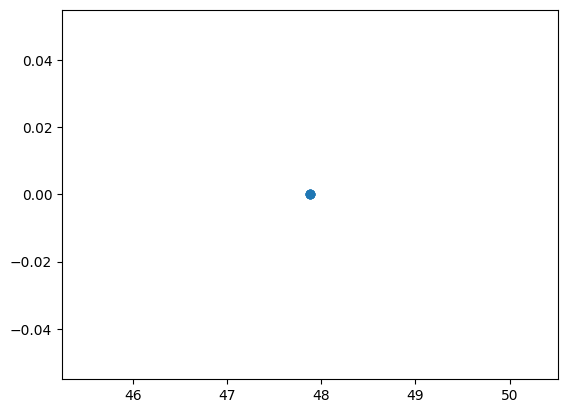

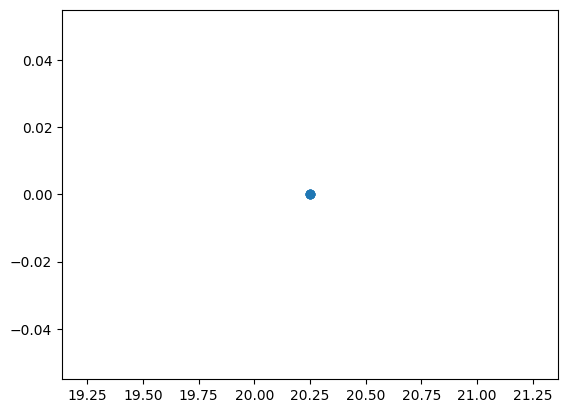

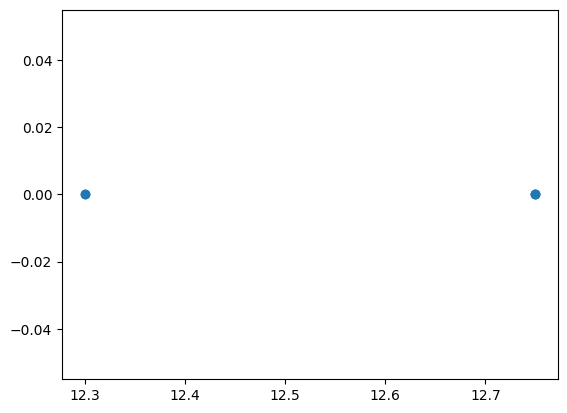

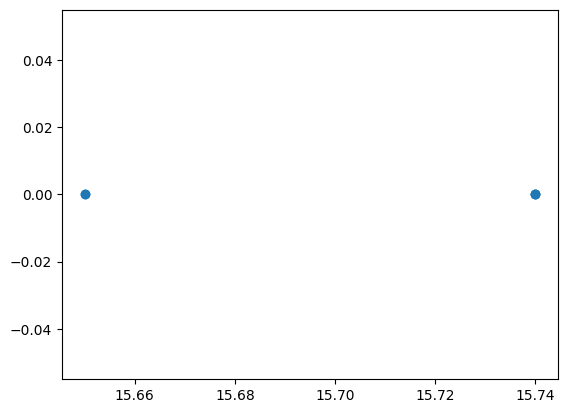

In [6]:
for element in top_5:
    plt.figure()
    demeaned = PQ.skip_demean_quantity(element, period=12)
    plt.scatter(demeaned.price, demeaned.quantity)
plt.show()

nan


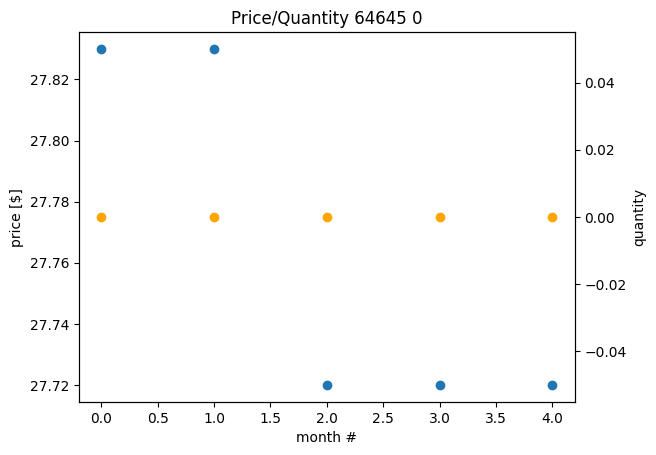

nan


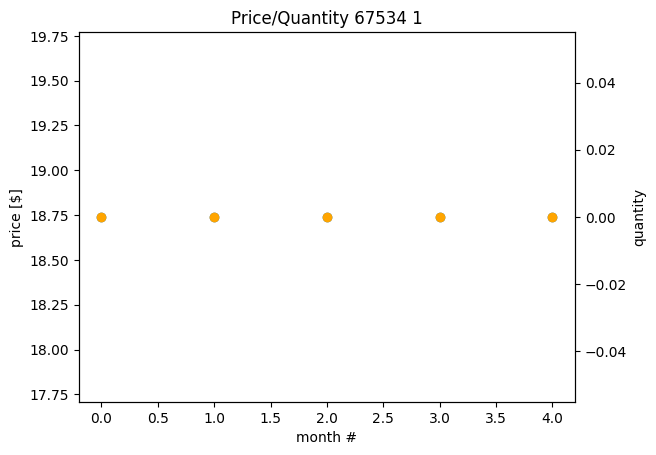

nan


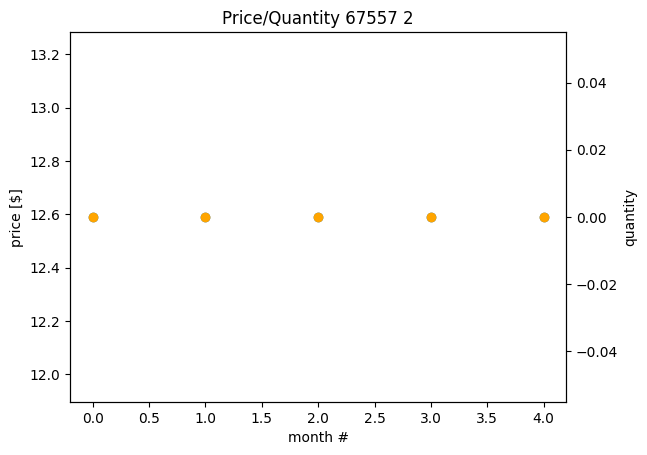

nan


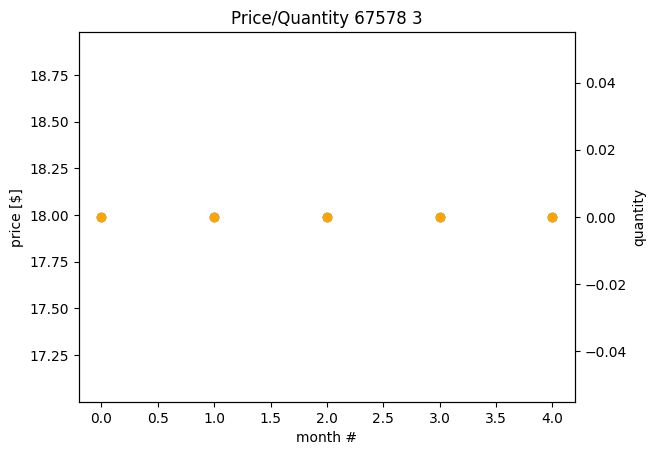

nan


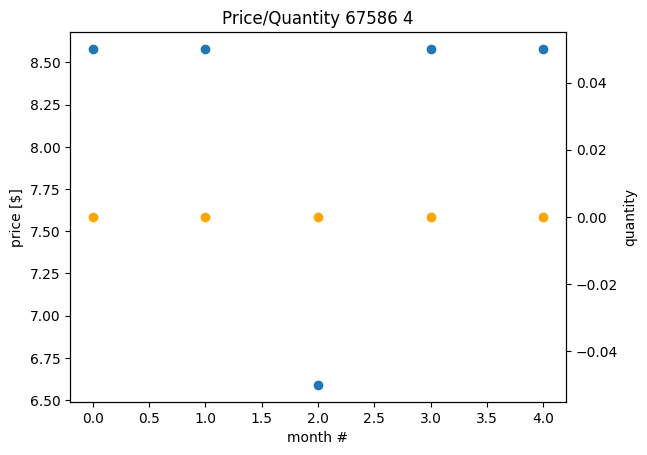

nan


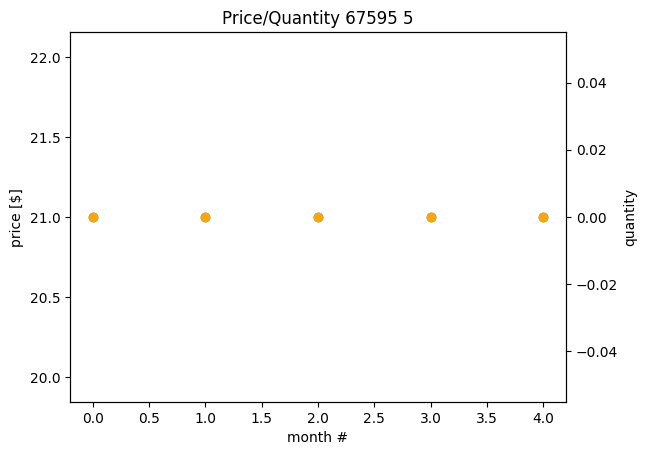

nan


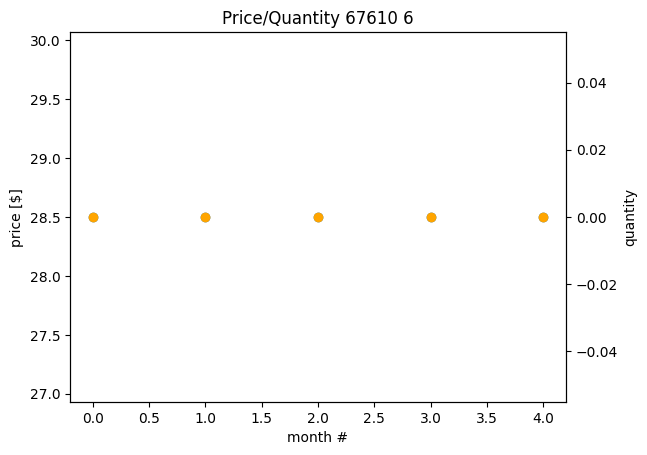

nan


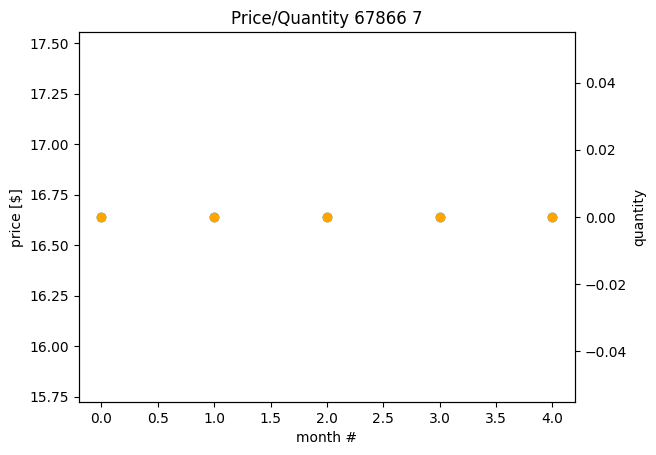

nan


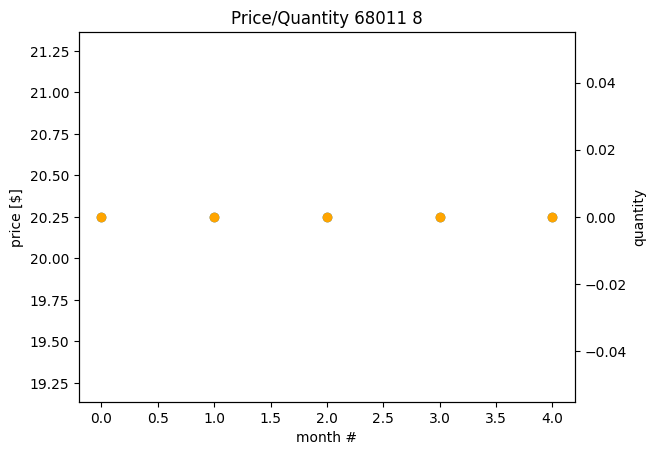

nan


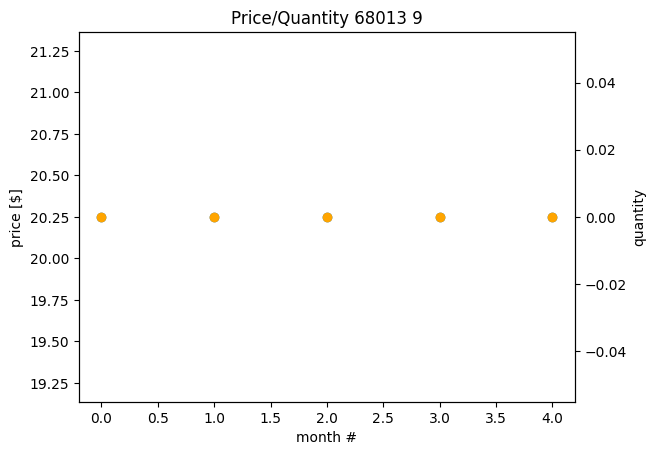

nan


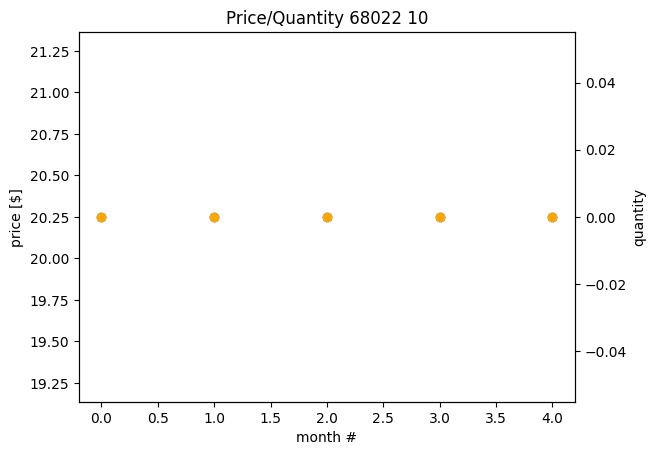

nan


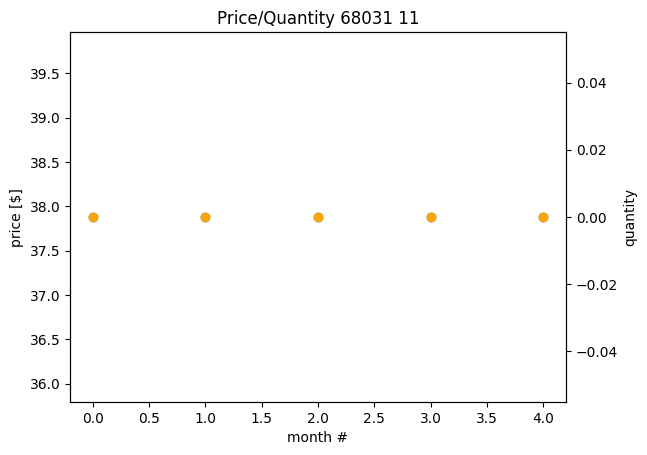

nan


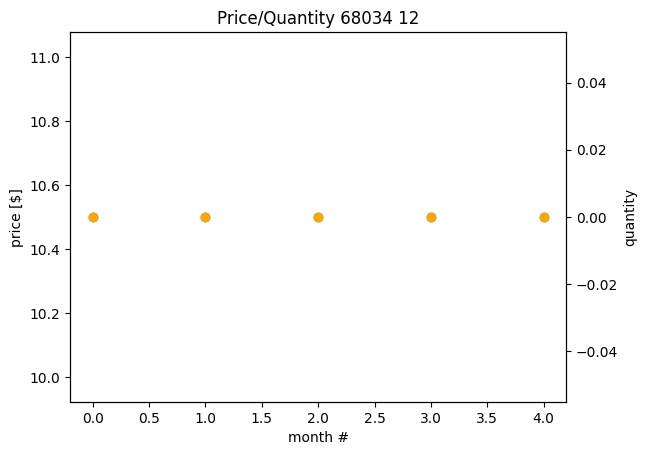

nan


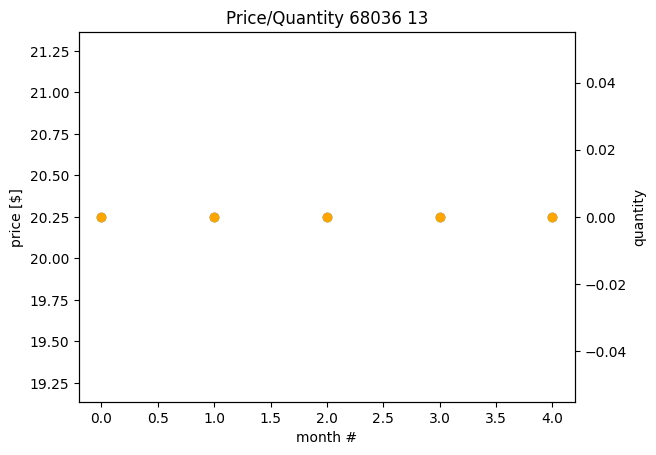

nan


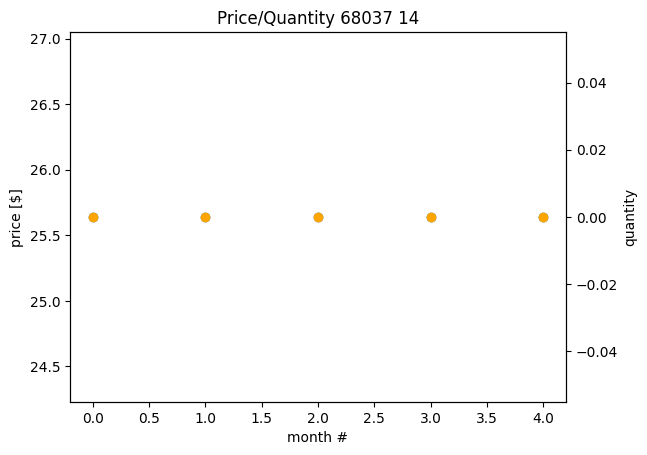

nan


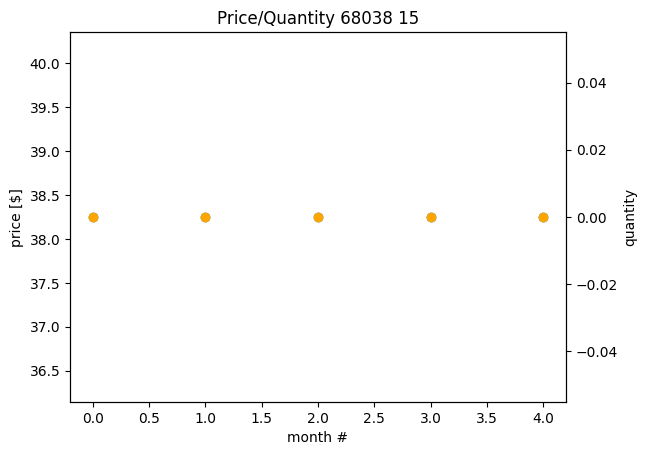

nan


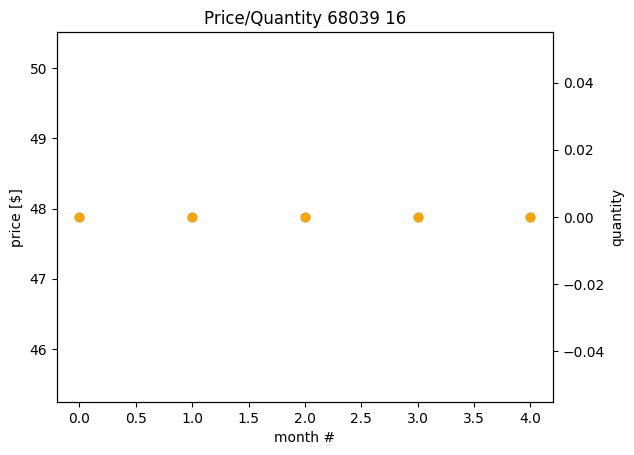

nan


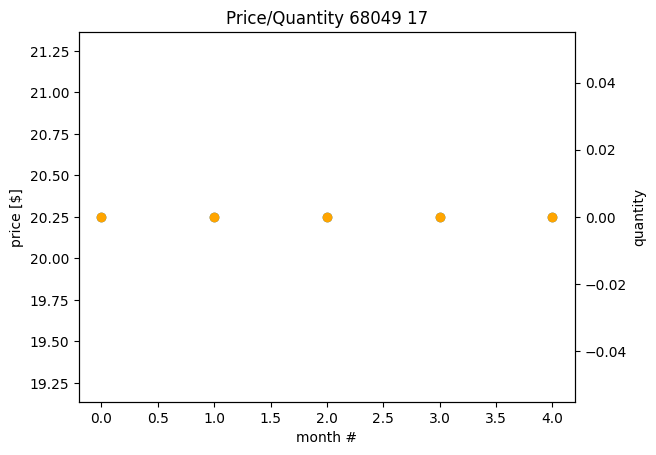

nan


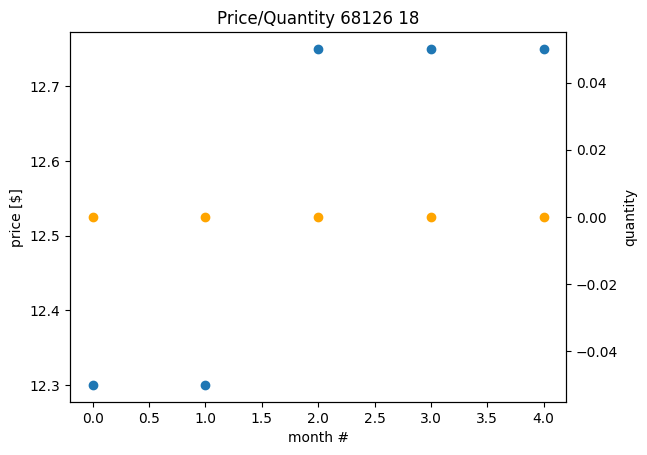

nan


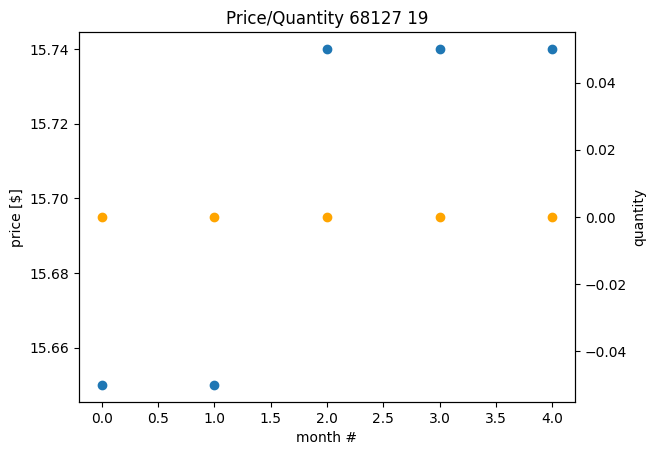

In [7]:

def draw_scatter_graph(pq, label=None):
    if label is None:
        label = ""
    fig, ax1 = plt.subplots()
    ax1.set_title(label)
    ax1.set_xlabel("month #")
    
    ax1.plot(pq.price, marker='o', linestyle='none')
    ax2 = ax1.twinx()
    ax2.plot(pq.quantity, marker='o', linestyle='none', color='orange')
    
    ax1.set_ylabel("price [$]")
    ax2.set_ylabel("quantity")
    print(np.corrcoef(x=pq.price, y=pq.quantity)[0, 1])
    plt.show()
        
                
demean = True
shift = False
for i, pq in enumerate(top_5):
    if demean:
        pq = PQ.skip_demean_quantity(pq, 12)
    if shift:
        pq = PQ.shift_price(pq, -1)
    draw_scatter_graph(pq, label=f"Price/Quantity {pq.header} {i}")        
    